In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.patches import Patch

In [2]:
dfAccident = pd.read_csv('Resources/MoonAccidents.csv')
dfAccident.head()

,Unnamed: 0,Accident_Severity,Number_of_Casualties,Date,Time,Phase
0,0,Serious,1.0,04-01-2005,17:42,Third Quarter
1,1,Light,1.0,04-01-2005,12:30,Third Quarter
2,2,Light,1.0,04-01-2005,09:28,Third Quarter
3,3,Light,1.0,04-01-2005,18:48,Third Quarter
4,4,Light,1.0,04-01-2005,15:45,Third Quarter


In [3]:
dfAccident = dfAccident[['Accident_Severity', 'Number_of_Casualties', 'Date', 'Time', 'Phase']]
dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase
0,Serious,1.0,04-01-2005,17:42,Third Quarter
1,Light,1.0,04-01-2005,12:30,Third Quarter
2,Light,1.0,04-01-2005,09:28,Third Quarter
3,Light,1.0,04-01-2005,18:48,Third Quarter
4,Light,1.0,04-01-2005,15:45,Third Quarter


In [4]:
dfAccident.to_csv('Resources/MoonAccidents.csv')

In [5]:
test = dfAccident
test = test.groupby(['Accident_Severity'])

test.count().head()

,Number_of_Casualties,Date,Time,Phase
Accident_Severity,,,,
Fatal,9320,9320,9318,9320
Light,616948,616948,616893,616948
Serious,98382,98382,98370,98382


In [6]:
dfAccident['Year'] = ''

for index, row in dfAccident.iterrows():
    date = row['Date']
    year = date.split('-')[2]
    dfAccident.at[index, 'Year'] = year

dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase,Year
0,Serious,1.0,04-01-2005,17:42,Third Quarter,2005
1,Light,1.0,04-01-2005,12:30,Third Quarter,2005
2,Light,1.0,04-01-2005,09:28,Third Quarter,2005
3,Light,1.0,04-01-2005,18:48,Third Quarter,2005
4,Light,1.0,04-01-2005,15:45,Third Quarter,2005


In [7]:
dfAccident['Accident_Severity'].unique()

array(['Serious', 'Light', 'Fatal'], dtype=object)

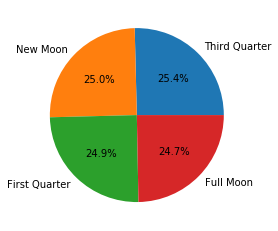

In [8]:
gPhases = dfAccident.groupby('Phase')

plt.pie(dfAccident['Phase'].value_counts(), labels = dfAccident['Phase'].unique(), autopct='%1.1f%%')
plt.show()

In [9]:
dfAccident['Phase'].value_counts()

First Quarter    183997
New Moon         181280
Full Moon        180394
Third Quarter    178979
Name: Phase, dtype: int64

In [10]:
dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase,Year
0,Serious,1.0,04-01-2005,17:42,Third Quarter,2005
1,Light,1.0,04-01-2005,12:30,Third Quarter,2005
2,Light,1.0,04-01-2005,09:28,Third Quarter,2005
3,Light,1.0,04-01-2005,18:48,Third Quarter,2005
4,Light,1.0,04-01-2005,15:45,Third Quarter,2005


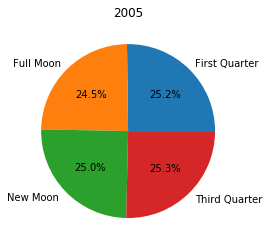

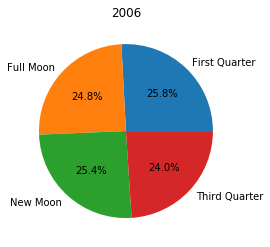

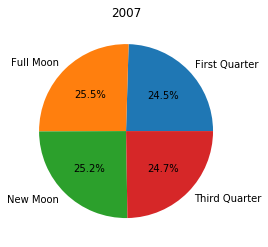

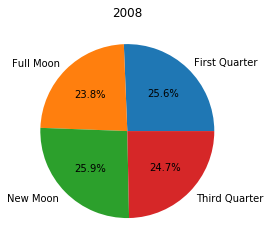

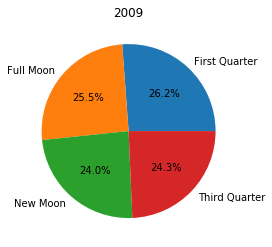

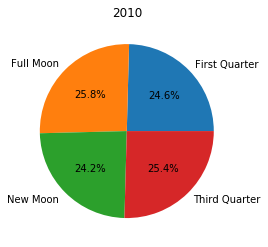

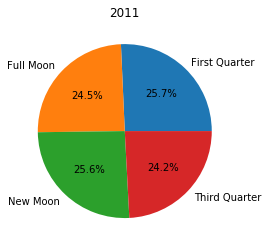

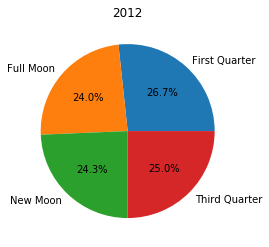

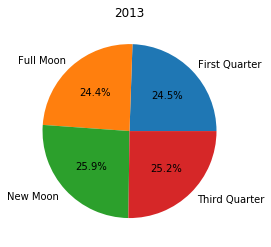

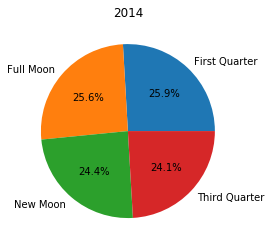

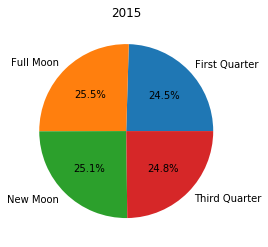

Full Moon        14565
New Moon         14353
Third Quarter    14159
First Quarter    13997
Name: Phase, dtype: int64

In [11]:
years = dfAccident['Year'].unique()

for year in years:
    dfYear = dfAccident.query('Year == @year')
    gPhase = dfYear.groupby('Phase')
    plt.pie(gPhase['Date'].count(), labels = gPhase.count().index, autopct='%1.1f%%')
    plt.title(year)
    plt.show()
    
dfYear['Phase'].value_counts()

In [12]:
dfPhase = dfAccident.query('Phase == "Third Quarter"')
gPhase = dfPhase.groupby('Accident_Severity')

gPhase.count()


,Number_of_Casualties,Date,Time,Phase,Year
Accident_Severity,,,,,
Fatal,2356,2356,2355,2356,2356
Light,151977,151977,151962,151977,151977
Serious,24646,24646,24644,24646,24646


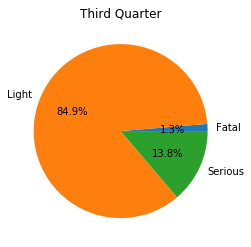

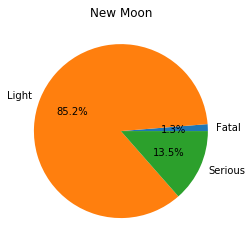

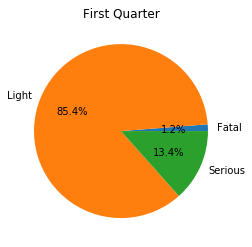

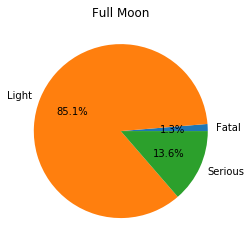

In [13]:
phases = dfAccident['Phase'].unique()
for phase in phases:
    
    dfPhase = dfAccident.query('Phase == @phase')
    gPhase = dfPhase.groupby('Accident_Severity')
    plt.pie(gPhase['Date'].count(), labels = gPhase.count().index, autopct='%1.1f%%')
    plt.title(phase)
    plt.show()

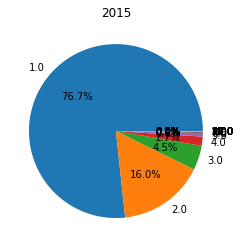

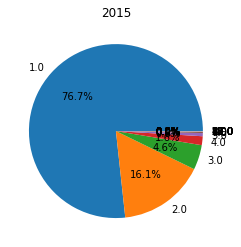

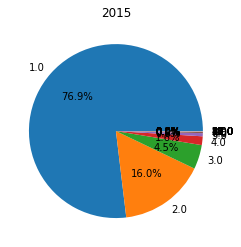

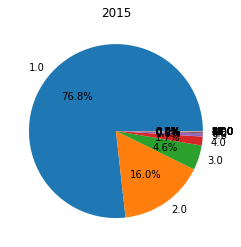

In [14]:
phases = dfAccident['Phase'].unique()

for phase in phases:
    dfPhase = dfAccident.query('Phase == @phase')
    gPhase = dfPhase.groupby('Number_of_Casualties')
    plt.pie(gPhase['Date'].count(), labels = gPhase.count().index, autopct='%1.1f%%')
    #too lazy to merge the smaller percents
    plt.title(year)
    plt.show()

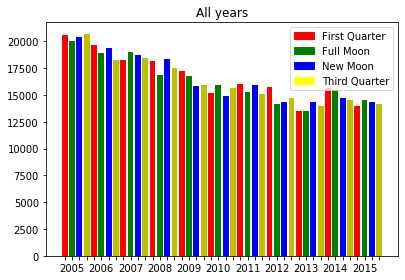

In [15]:
labels = []
for year in years:
    dfYear = dfAccident.query('Year == @year')
    gYear = dfYear.groupby('Phase')
    phaseCounts = dfYear['Phase'].value_counts().sort_index()
    phaseOrder = dfYear['Phase'].unique()
    plt.bar(height = phaseCounts, x = (phaseOrder + year), color = ['r', 'g', 'b', 'y'])
    #super ghetto
    labels.append('')
    labels.append(year)
    labels.append('')
    labels.append('')

legend_elements = [Patch(facecolor='red', edgecolor='red',label='First Quarter'),
                   Patch(facecolor='green', edgecolor='green',label='Full Moon'),
                   Patch(facecolor='blue', edgecolor='blue',label='New Moon'),
                   Patch(facecolor='yellow', edgecolor='yellow',label='Third Quarter')]
    
plt.legend(handles = legend_elements)
test = range(len(years) *4)
plt.title('All years')
plt.tight_layout()
plt.xticks(test, labels = labels)
plt.show()

In [16]:
#TODO: add comments
dfAccident['Time Compare'] = 0.0
dfAccident['Hour'] = 0
dfAccident = dfAccident.dropna()
for index, row in dfAccident.iterrows():
    try:
        time = row['Time']
        hour = time.split(':')[0]
        dfAccident.at[index, 'Hour'] = hour
        minute = time.split(':')[1]
        minutePercent = float(float(minute)/60.0)
        timePercent = float(hour) + minutePercent
        dfAccident.at[index, 'Time Compare'] = timePercent
    except:
        print(row['Time'])
        print(type(row['Time']))

In [17]:
dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase,Year,Time Compare,Hour
0,Serious,1.0,04-01-2005,17:42,Third Quarter,2005,17.700000,17
1,Light,1.0,04-01-2005,12:30,Third Quarter,2005,12.500000,12
2,Light,1.0,04-01-2005,09:28,Third Quarter,2005,9.466667,9
3,Light,1.0,04-01-2005,18:48,Third Quarter,2005,18.800000,18
4,Light,1.0,04-01-2005,15:45,Third Quarter,2005,15.750000,15


In [18]:
dfAccident['Time Compare'] = round(dfAccident['Time Compare'], 2)
dfAccident.head()

C:\Users\caroj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Accident_Severity,Number_of_Casualties,Date,Time,Phase,Year,Time Compare,Hour
0,Serious,1.0,04-01-2005,17:42,Third Quarter,2005,17.70,17
1,Light,1.0,04-01-2005,12:30,Third Quarter,2005,12.50,12
2,Light,1.0,04-01-2005,09:28,Third Quarter,2005,9.47,9
3,Light,1.0,04-01-2005,18:48,Third Quarter,2005,18.80,18
4,Light,1.0,04-01-2005,15:45,Third Quarter,2005,15.75,15


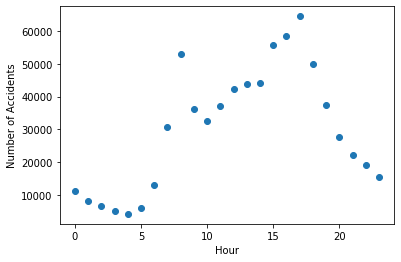

In [19]:
#TODO: add comments and plot details
gHour = dfAccident.groupby('Hour')

plt.scatter(gHour.count().index, gHour['Date'].count())
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

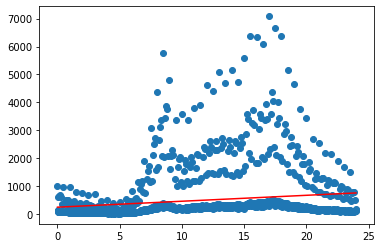

r value: 0.1649624673554428


In [20]:
#TODO: add comments and plot details
gTimeCompare = dfAccident.groupby('Time Compare')
times = gTimeCompare.count().index
counts = gTimeCompare['Date'].count()
slope, intr, r, p, stderr = stats.linregress(times, counts)

y = slope * times + intr

plt.plot(times, y, color= 'r')
plt.scatter(times, counts)
plt.show()
print(f'r value: {r}')

In [21]:
dfNonMoon = pd.read_csv('Resources/TotalAccidents_NonMoonPhase.csv')

dfNonMoon.head()

,Date,Total_Accidents
0,01-01-2005,308
1,01-01-2007,335
2,01-01-2009,244
3,01-01-2011,204
4,01-01-2013,262


In [22]:
#TODO: add comments
dfNonMoon['Year'] = 0
for index, row in dfNonMoon.iterrows():
    date = row['Date']
    year = date.split('-')[2]
    dfNonMoon.at[index, 'Year'] = year
    
dfNonMoon.head()

,Date,Total_Accidents,Year
0,01-01-2005,308,2005
1,01-01-2007,335,2007
2,01-01-2009,244,2009
3,01-01-2011,204,2011
4,01-01-2013,262,2013


<BarContainer object of 11 artists>

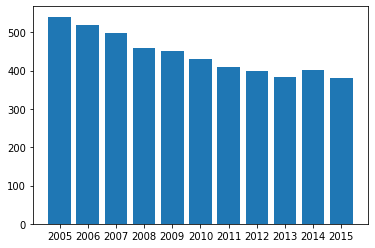

In [23]:
#TODO: add comments and plot title/labels
average = []
for year in years:
    dfYear = dfNonMoon.query('Year == @year')
    total = dfYear['Total_Accidents'].sum()
    average.append(total / len(dfYear['Year']))
plt.bar(height = average, x = (years))

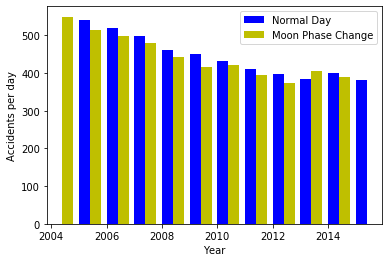

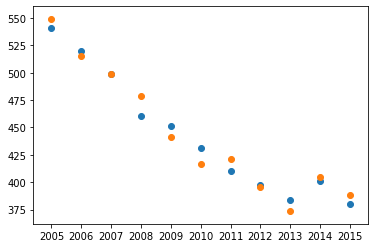

In [24]:
#TODO: add comments cleanup names title plot
yearsMoon = dfAccident['Year'].unique()
phases = dfAccident['Phase'].unique()
averageMoon = []
for year in yearsMoon:
    dfYear = dfAccident.query('Year == @year')
    total = len(dfYear)
    averageMoon.append(total / len(dfYear['Date'].unique()))

#TODO: clean up this nonsense
yearsFloatMoon = [(float(year) - 0.4) for year in yearsMoon]
yearsFloatNo = [(float(year)+ 0.2) for year in years]

plt.bar(height = average, x = yearsFloatNo , width = 0.4, color = 'b', label = 'Normal Day')
plt.bar(height = averageMoon, x =  yearsFloatMoon, width = 0.4, color = 'y', label = 'Moon Phase Change')

plt.legend()
plt.xlabel('Year')
plt.ylabel("Accidents per day")
plt.show()

plt.scatter(years, average)
plt.scatter(yearsMoon, averageMoon)

plt.show()

In [25]:
#TODO: statistics stuff to back up what our graphs show